# Abandono y Éxito Académico: Un Enfoque Estadístico
## Tópico
El tema de nuestro proyecto es el análisis estadístico del abandono escolar y el éxito académico 
en estudiantes de educación superior, utilizando datos reales obtenidos de Kaggle.

Las incógnitas formuladas para su estudio son:
1. ¿Tienden los estudiantes que se graduaron a mostrar valores de 
   rendimiento mayores que los estudiantes que abandonaron la carrera?
2. ¿Qué variables socioeconómicas y académicas influyen de forma más significativa 
   en la probabilidad de abandono y en el éxito académico?
3. ¿Es posible predecir el abandono académico o el éxito de un estudiante utilizando 
   técnicas estadísticas y de clasificación?

## Importación de los módulos usados para el estudio posterior
En estos seis módulos se concentra todo el proceso y pipeline que da respuesta a las preguntas de investigación:

- `data_preparation`: prepara y transforma los datos para que sean aptos para el análisis estadístico posterior, este incluye manejo de valores faltantes, codificación de variables categóricas, estandarización/normalización de variables numéricas, detección y tratamiento de outliers.
- `descriptive_stats`: genera estadísticas descriptivas por cada variable (media, mediana, moda, mínimo, máximo, rango, varianza, desviación estándar, rango intercuartílico y frecuencias para categóricas), produciendo informes individuales y un resumen en CSV.
- `data_visualization`: se centra en producir gráficas descriptivas y comparativas (rendimiento, edad, estado civil, becas, distribución de la variable objetivo) que permiten entender e intuir rápidamente patrones y diferencias entre grupos de estudiantes.
- `pattern_discovery`: aplica métodos de descubrimiento de patrones y segmentación (clustering, análisis de asociación) para identificar perfiles de estudiantes y reglas relacionadas con el abandono.
- `performance_analysis`: comparar estadísticamente el rendimiento académico entre estudiantes que abandonaron la carrera y los que se graduaron, para determinar si existe una diferencia significativa en sus tasas de aprobación.
- `predicting_success`: construye y evalúa modelos predictivos (regresión logística), realiza selección de variables y validación cruzada para estimar riesgo de abandono y probabilidad de éxito.

Cada módulo genera artefactos (dataframes, figuras, modelos y métricas) que se integran en este cuaderno para la interpretación de resultados.

In [ ]:
from pathlib import Path
import sys
# Asegura que la carpeta 'scripts' esté en el path (notebook está en /notebook)
scripts_dir = Path('..') / 'scripts'
sys.path.insert(0, str(scripts_dir.resolve()))
# Importar los módulos de scripts (todos los scripts disponibles)
import data_preparation
import descriptive_stats
import data_visualization
import clustering_analysis
import performance_analysis
import predicting_success
import pandas as pd
# Cargar dataset (ahora en la primera celda de código para disponibilidad global)
df = pd.read_csv(str(Path('..') / 'dataset' / 'dataset.csv'), encoding='utf-8', low_memory=False)
print("Módulos importados y dataset cargado correctamente.")

Módulos importados y dataset cargado correctamente.


## Análisis exploratorio de los datos
En esta etapa se examinan estadísticos descriptivos que permiten identificar tendencias centrales, niveles de dispersión y posibles anomalías. Además, se emplean visualizaciones esenciales como histogramas, boxplots y gráficos de dispersión para revelar patrones, relaciones entre variables y valores atípicos que podrían influir en el análisis posterior. Esta exploración inicial ofrece una visión preliminar que orienta las preguntas de nuestra investigación

### Estadísticos descriptivos
A continuación, para cada una de nuestras variables se presentan los estadísticos descriptivos calculados: media, mediana, moda, mínimo, máximo, rango, varianza, desviación estándar y rango intercuartílico.

In [4]:
# Mostrar estadísticos descriptivos
descriptive_stats.main(str(Path('..') / 'dataset' / 'dataset.csv'), str(Path('..') / 'outputs'))

Variable: Marital status
media aritmética: 1.18
mediana: 1.00
moda: 1
medidas de dispersión: minimo: 1.00, maximo: 6.00, rango: 5.00
varianza: 0.37
desviación estándar: 0.61
rango intercuartílico: 0.00

Variable: Application mode
media aritmética: 6.89
mediana: 8.00
moda: 1
medidas de dispersión: minimo: 1.00, maximo: 18.00, rango: 17.00
varianza: 28.08
desviación estándar: 5.30
rango intercuartílico: 11.00

Variable: Application order
media aritmética: 1.73
mediana: 1.00
moda: 1
medidas de dispersión: minimo: 0.00, maximo: 9.00, rango: 9.00
varianza: 1.73
desviación estándar: 1.31
rango intercuartílico: 1.00

Variable: Course
media aritmética: 9.90
mediana: 10.00
moda: 12
medidas de dispersión: minimo: 1.00, maximo: 17.00, rango: 16.00
varianza: 18.76
desviación estándar: 4.33
rango intercuartílico: 7.00

Variable: Daytime/evening attendance
media aritmética: 0.89
mediana: 1.00
moda: 1
medidas de dispersión: minimo: 0.00, maximo: 1.00, rango: 1.00
varianza: 0.10
desviación estándar: 0

### Visualización de datos
Para facilitar la interpretación de los volúmenes con los que trabajamos, se presenta a continuación un gráfico de pastel que resume su distribución.

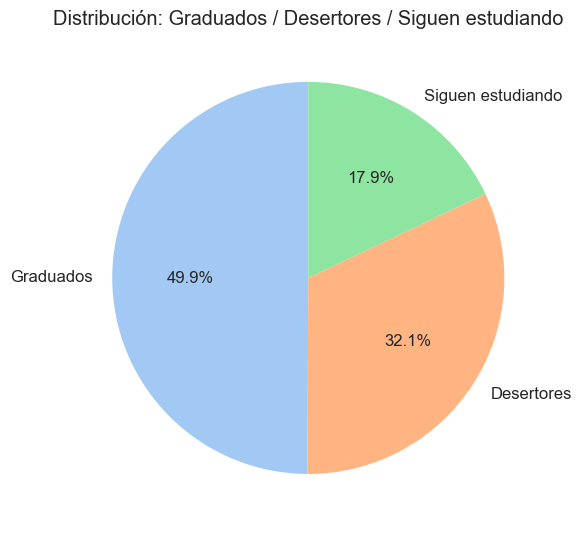

Gráfico de pastel guardado en: ..\outputs\data_visualization\pie_Target.png


In [5]:
# Genera y muestra el gráfico
out = Path('..') / 'outputs' / 'data_visualization'
data_visualization.generate_target_piechart(df, out, target_col='Target', show=True)


Como punto de partida, podemos observar el comportamiento del rendimiento académico de los estudiantes que se graduaron en comparación con aquellos que desertaron, así como analizar las edades promedio de matrícula correspondientes a ambos grupos. Asimismo, se integra una representación gráfica que detalla la proporción de estudiantes según su estatus de beca, así como la distribución del estado civil correspondiente a cada grupo:

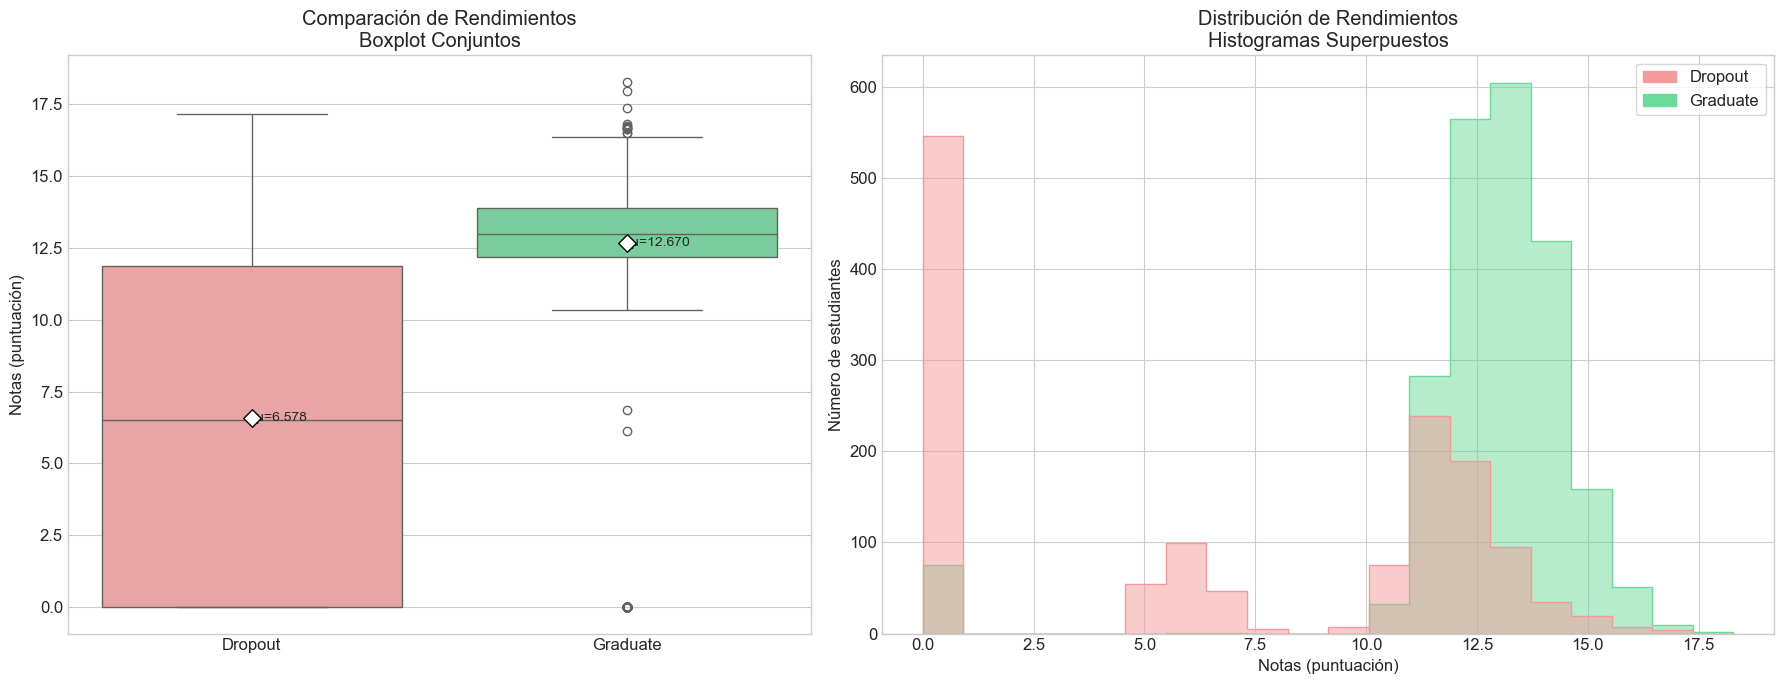

Histograma de rendimientos guardado en: ..\outputs\data_visualization\rendimiento_comparison_Target.png


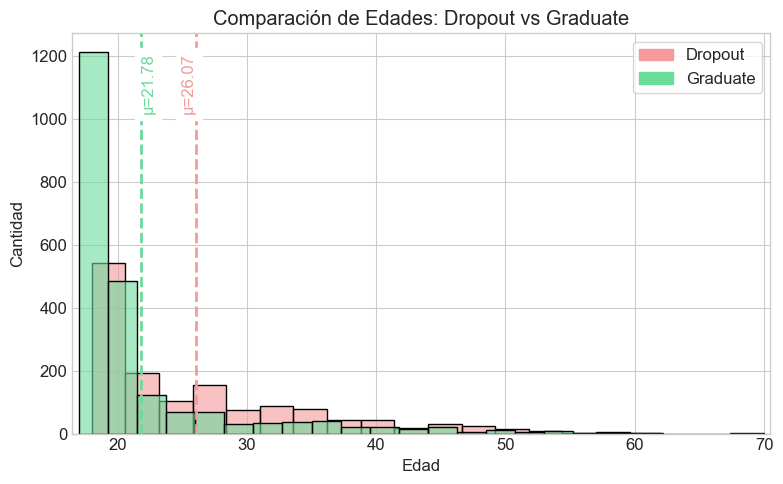

Histograma de edades guardado en: ..\outputs\data_visualization\age_overlay_Age at enrollment.png


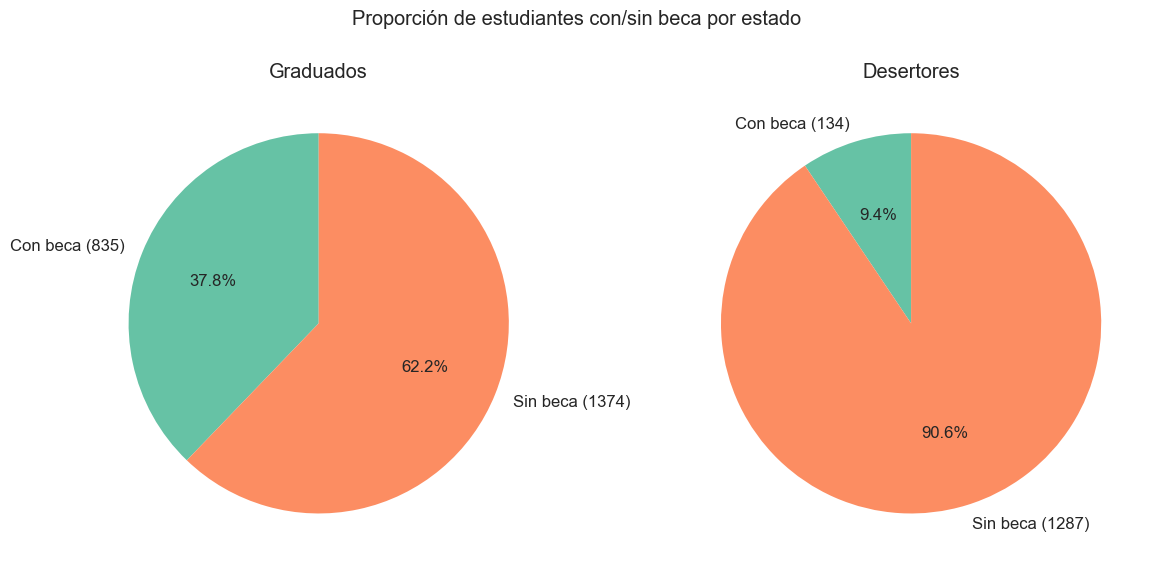

Gráfico de becas guardado en: ..\outputs\data_visualization\pie_scholarship_Scholarship holder.png


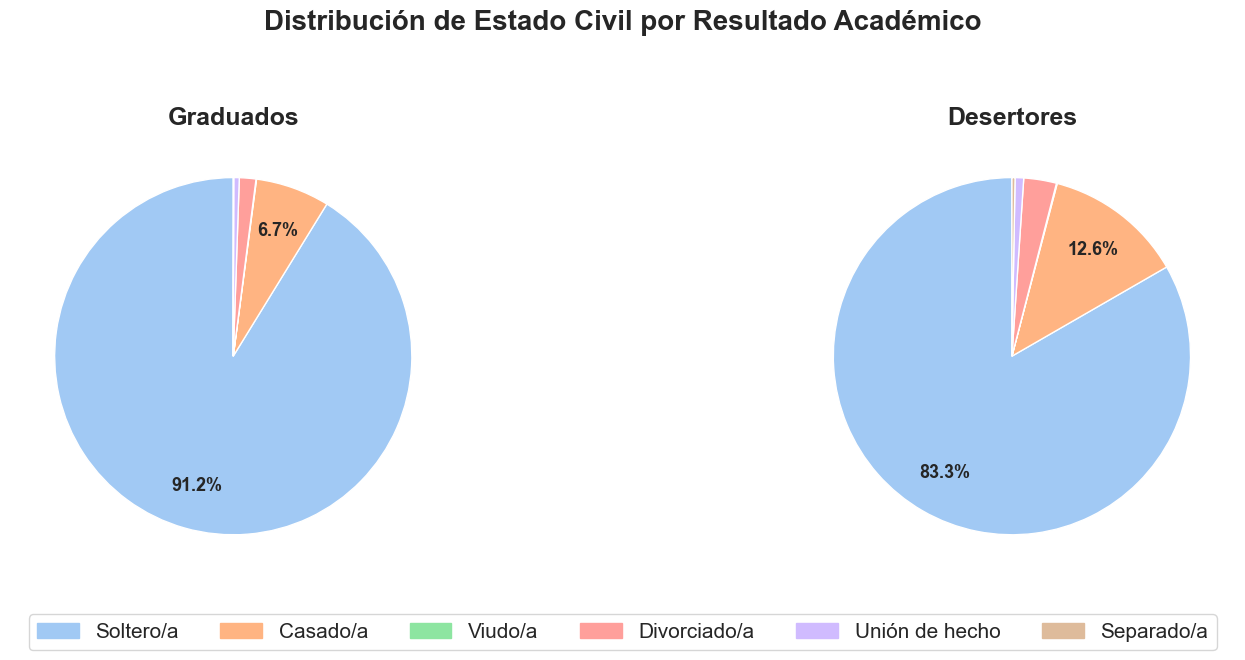

Gráfico de estado civil guardado en: ..\outputs\data_visualization\pie_marital_status_Marital status.png


In [6]:
import importlib
importlib.reload(data_visualization)

out = Path('..') / 'outputs' / 'data_visualization'
out.mkdir(parents=True, exist_ok=True)
# Llamar a la función combinada de rendimiento (boxplot + histogramas)
data_visualization.generate_rendimiento_comparison(df, out, target_col='Target', show=True)
# Superponer histogramas de edad para ambos grupos
data_visualization.generate_age_overlay_histogram(df, out, age_col=None, target_col='Target', show=True)
# Generar gráfico de torta para becarios y no becarios
data_visualization.plot_scholarship_pie(df, out, target_col='Target', scholarship_col='Scholarship holder', show=True)
# Generar gráfico de pastel: Estado civil (Graduados vs Desertores)
data_visualization.plot_marital_status_pie(df, out, target_col='Target', marital_col='Marital status', show=True)

#### Interpretación Visual

- Rendimiento: Los datos muestran una diferencia sustancial en el rendimiento académico entre ambos grupos. El grupo Dropout presenta una media de aprobación baja , con una alta dispersión, lo que sugiere variabilidad en el desempeño y posibles dificultades académicas desde el inicio. En contraste, el grupo Graduate exhibe una media significativamente mayor, con una distribución más concentrada, lo que indica consistencia en el rendimiento y una base académica más sólida. Estos patrones apunta a que la tasa de aprobación en el primer semestre podría ser un indicador temprano del desenlace académico.

- Edad: Se puede plantear, de manera preliminar, que la mayor edad promedio observada está en el grupo de estudiantes no graduados podría estar asociada a mayores responsabilidades sociales, familiares o laborales, lo cual reduciría el tiempo disponible para dedicar a los estudios. En contraste, los estudiantes que sí lograron graduarse tienden a ingresar al programa en edades más comunes o tradicionales, lo que presumiblemente implica menos cargas externas y una mayor capacidad para sostener el ritmo académico requerido.

- Beca: Por otro lado, los gráficos de pastel sugieren sutilmente que tener una beca podría estar asociado positivamente con la permanencia y éxito académico. Los estudiantes con apoyo económico parecen tener mayor probabilidad de completar sus estudios.

- Estado Civil: La distribución insinúa que el estado civil podría influir en el desenlace académico, donde los estudiantes solteros muestran mayor tasa de graduación. En contraste, el resto de los estados aparecen como minorías en ambos grupos, pero su presencia es ligeramente más visible entre los desertores. Esto podría indicar que las responsabilidades familiares asociadas al matrimonio impactan de manera menos favorable en la continuidad académica.

Se emplean histogramas y diagramas de caja (boxplots) como herramientas de análisis exploratorio para identificar la forma de las distribuciones, evaluar relaciones entre variables y detectar posibles valores atípicos. Todas las variables del conjunto de datos han sido representadas mediante estas técnicas gráficas. Las visualizaciones resultantes se encuentran almacenadas para su consulta en la carpeta outputs/data_visualization

In [7]:
# Ejecutar la función principal de data_visualization directamente
data_visualization.main(str(Path('..') / 'dataset' / 'dataset.csv'), str(Path('..') / 'outputs' / 'data_visualization'))

Gráficas generadas exitosamente en: ..\outputs\data_visualization


### Preparación de Datos
Se efectuaron los ajustes necesarios para asegurar que la información se encontrara en un estado adecuado para su análisis subsiguiente. Estas operaciones incluyeron, entre otros procedimientos, la gestión de datos incompletos, la transformación de variables categóricas en representaciones susceptibles de análisis y la estandarización de los atributos de tipo numérico.

In [8]:
# Ejecutar la preparación de datos
data_preparation.prepare_data(
    input_path=str(Path('..') / 'dataset' / 'dataset.csv'),
    output_dir=str(Path('..') / 'outputs' / 'prepared_data')
)

🔧 PREPARACIÓN DE DATOS - Pipeline de Transformaciones

📂 Cargando datos desde: ..\dataset\dataset.csv

📋 PASO 0: Añadir Variable de Rendimiento
✓ Variable calculada 'Tasa_aprobacion_1sem' añadida al DataFrame
   Dimensiones: 4,424 filas × 36 columnas

📋 PASO 1: Análisis y Manejo de Valores Faltantes

✅ No se encontraron valores faltantes en el dataset

📋 PASO 2: Identificación de Tipos de Variables

   Variables categóricas (codificadas): 9
   Variables binarias: 8
   Variables numéricas continuas: 18
   Variable objetivo: ['Target']

📋 PASO 3: Codificación de Variable Objetivo
✓ Variable objetivo 'Target' codificada:
    Dropout → 0
    Enrolled → 1
    Graduate → 2

📋 PASO 4: Detección y Manejo de Outliers
✓ Application order: 1 outliers detectados (método: iqr, acción: flag, skew=1.881, tipo=right)
✓ Age at enrollment: 5 outliers detectados (método: iqr, acción: flag, skew=2.055, tipo=right)
✓ Curricular units 1st sem (credited): 19 outliers detectados (método: iqr, acción: flag, sk

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited)_zscore,Curricular units 2nd sem (enrolled)_zscore,Curricular units 2nd sem (evaluations)_zscore,Curricular units 2nd sem (approved)_zscore,Curricular units 2nd sem (grade)_zscore,Curricular units 2nd sem (without evaluations)_zscore,Unemployment rate_zscore,Inflation rate_zscore,GDP_zscore,Tasa_aprobacion_1sem_zscore
0,1,8,5,2,1,1,1,13,10,6,...,-0.28241,-2.838016,-2.042399,-1.471361,-1.963267,-0.199418,-0.287606,0.124372,0.765674,-1.910722
1,1,6,1,11,1,1,1,1,3,4,...,-0.28241,-0.105714,-0.522623,0.518845,0.659487,-0.199418,0.876123,-1.105097,0.347160,0.827153
2,1,1,5,5,1,1,1,22,27,10,...,-0.28241,-0.105714,-2.042399,-1.471361,-1.963267,-0.199418,-0.287606,0.124372,0.765674,-1.910722
3,1,8,2,15,1,1,1,23,27,6,...,-0.28241,-0.105714,0.490561,0.187144,0.416403,-0.199418,-0.813161,-1.466705,-1.375356,0.827153
4,2,12,1,3,0,1,1,22,28,10,...,-0.28241,-0.105714,-0.522623,0.518845,0.531548,-0.199418,0.876123,-1.105097,0.347160,0.370841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,-0.28241,-0.105714,-0.016031,0.187144,0.467578,-0.199418,1.476757,1.136876,-1.789464,0.370841
4420,1,1,2,15,1,1,19,1,1,10,...,-0.28241,-0.105714,-0.522623,-0.807959,0.147730,-0.199418,-0.174987,-0.454201,0.889026,0.827153
4421,1,1,1,12,1,1,1,22,27,10,...,-0.28241,0.805053,0.237265,-1.139660,0.627502,-0.199418,0.876123,-1.105097,0.347160,0.827153
4422,1,1,1,9,1,1,1,22,27,8,...,-0.28241,-0.561098,-0.522623,0.187144,0.339639,-0.199418,-0.813161,-1.466705,-1.375356,0.827153


## ¿Tienden los estudiantes que se graduaron a mostrar valores de rendimiento mayores que los estudiantes que abandonaron la carrera?

Para abordar esta interrogante, es necesario establecer previamente una definición operativa de “rendimiento” a partir de las variables disponibles en nuestro conjunto de datos.

**Tasa de aprobación (rendimiento):**

$$\text{Tasa de aprobación} = \frac{\text{Materias aprobadas}}{\text{Materias matriculadas}}$$

En consecuencia, considerando el grupo de estudiantes que culminaron sus estudios y el grupo que presentó abandono académico, se formula la siguiente prueba de hipótesis:

- **H0:** No existe evidencia de que un grupo muestre valores de rendimiento mayores que el otro.
- **H1:** Un grupo muestra valores de rendimiento mayores que el otro.

Para este propósito, es necesario aplicar pruebas de normalidad que permitan determinar el tipo de contraste estadístico adecuado a aplicar. En consecuencia, se establece una prueba de hipótesis específica para evaluar la normalidad de las distribuciones involucradas:
- **H0:** Los datos siguen una distribución normal
- **H1:** Los datos NO siguen una distribución normal

> **Nota:** En todo el procedimiento se adoptará un nivel de significancia $\\alpha = 0.05$ como criterio de referencia para la toma de decisiones estadísticas.

A partir de la sección de exploración de datos, las visualizaciones sugieren que las distribuciones de ambos grupos —estudiantes que desertaron y estudiantes que se graduaron— no cumplen con los criterios visuales de normalidad. Se observa **asimetría marcada**, **diferencias en la dispersión** y otras irregularidades que refuerzan esta conclusión preliminar. En consecuencia, resulta pertinente aplicar pruebas formales de normalidad, como el **test de Shapiro-Wilk**, verificando previamente sus supuestos metodológicos: 
- **Independencia de las observaciones:** cada registro debe ser estadísticamente independiente. 
- **Datos continuos:** el test está diseñado para variables de naturaleza continua. 
- **Tamaño de muestra adecuado:** aunque el test es más eficiente en muestras pequeñas o medianas, la implementación de `shapiro` en la librería `scipy`, admite hasta **5,000 observaciones**, condición que nuestros datos cumplen satisfactoriamente. 

> **Nota:** Si bien dicho test es sensible a la presencia de valores atípicos, se considera la estructura y naturaleza de los datos, así como la forma de las distribuciones para evitar la eliminación de **falsos outliers**. No obstante se complementa con una inspección gráfica (Q-Q plots)


   ANÁLISIS DE RENDIMIENTO ACADÉMICO: ABANDONO vs GRADUACIÓN
   Pregunta: ¿Existe diferencia significativa en el rendimiento?
✓ Directorios de salida creados: ..\outputs\performance_analysis

1️⃣  CARGA DE DATOS
✓ Dataset cargado: ..\outputs\prepared_data\dataset_prepared.csv
  - Filas: 4,424
  - Columnas: 51

2️⃣  IDENTIFICACIÓN DE GRUPOS

Valores únicos en 'Target': ['Dropout' 'Graduate' 'Enrolled']

Distribución de Target:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

⚠️  Nota: Se encontraron 794 estudiantes 'Enrolled' (aún activos)
    Estos NO se incluyen en el análisis comparativo Dropout vs Graduate

📊 Resumen de grupos para análisis:
  • Grupo ABANDONO (Dropout):      1,421 estudiantes (32.1%)
  • Grupo NO ABANDONO (Graduate):  2,209 estudiantes (49.9%)

🔢 Total considerado (Dropout + Graduate): 3,630
  • % sobre Total (Dropout):   39.1%
  • % sobre Total (Graduate):  60.9%

4️⃣  ANÁLISIS EXPLORATORIO - VISUALIZACIONES
✓ Figura guardada: 

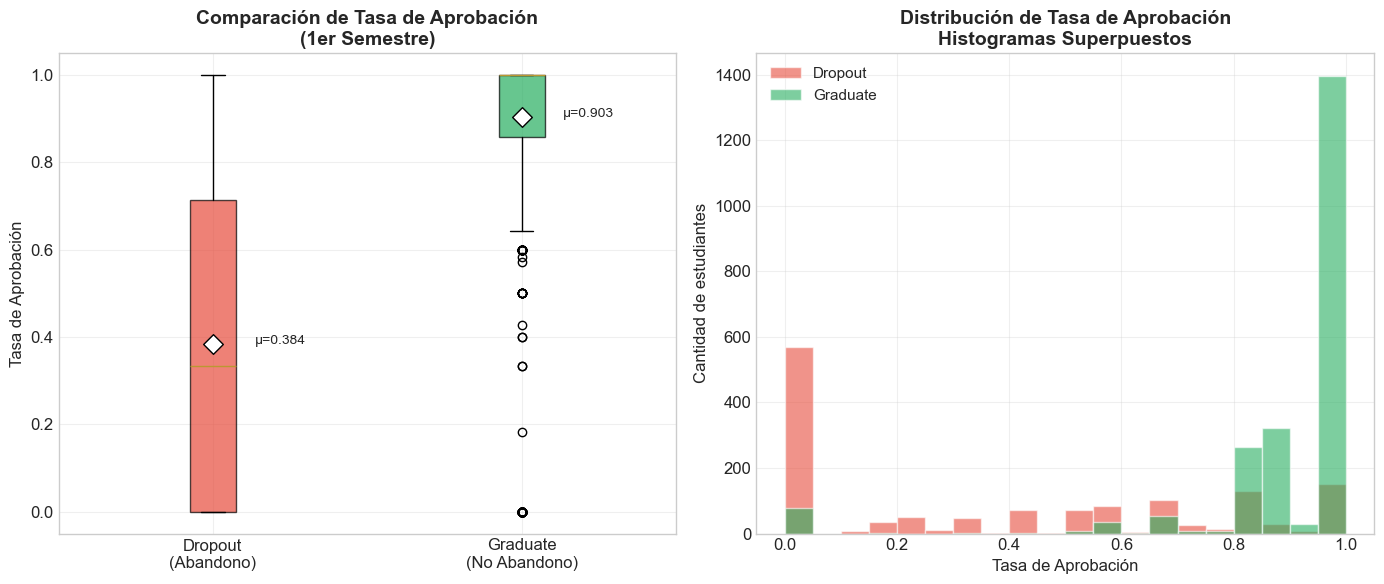


5️⃣  PRUEBAS DE NORMALIDAD (Shapiro-Wilk)

📊 Hipótesis:
   H0: Los datos siguen una distribución normal
   H1: Los datos NO siguen una distribución normal
   α = 0.05

⚠️ Outliers removidos antes de Shapiro-Wilk:
    - Dropout:  0
    - Graduate: 82

📈 Resultados Shapiro-Wilk:

   GRUPO DROPOUT (Abandono):
   - Estadístico W: 0.837030
   - p-value:       8.14e-36
   - Conclusión:    ✗ Distribución NO normal
   - Comparación: 8.14e-36 < 0.05 -> p-value < α: Rechazamos H0 (NO normal)

   GRUPO GRADUATE (No Abandono):
   - Estadístico W: 0.671580
   - p-value:       1.77e-53
   - Conclusión:    ✗ Distribución NO normal
   - Comparación: 1.77e-53 < 0.05 -> p-value < α: Rechazamos H0 (NO normal)

────────────────────────────────────────────────────────────
📋 DECISIÓN PARA PRUEBA ESTADÍSTICA:
   ✗ Al menos un grupo NO tiene distribución normal
   → Usar prueba NO paramétrica: Mann-Whitney U
────────────────────────────────────────────────────────────
✓ Q-Q plots guardados: ..\outputs\perfor

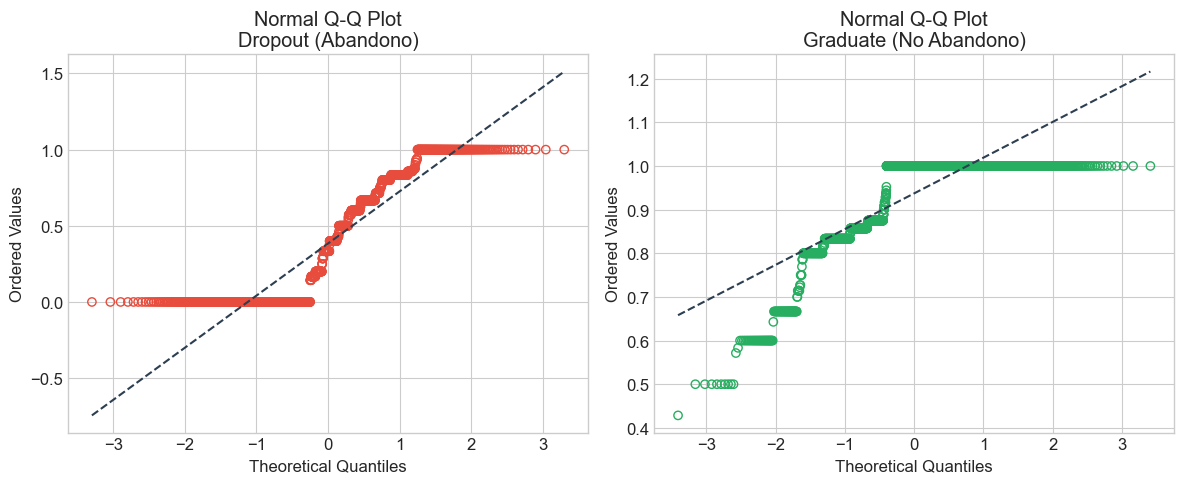


6️⃣  PRUEBA ESTADÍSTICA COMPARATIVA

📊 Hipótesis:
   H0 (nula): No existe evidencia de que un grupo muestre valores de rendimiento mayores que el otro
   H1 (alternativa): Un grupo muestra valores de rendimiento mayor que el otro
   α = 0.05

🔬 Prueba seleccionada: Mann-Whitney U (no paramétrica)

¿Por qué elegir Mann-Whitney U?
 - Se elige cuando al menos uno de los grupos NO cumple la suposición de normalidad.
 - Mann-Whitney es una prueba no paramétrica que compara el orden (ranks) de las observaciones entre grupos, es más robusta ante distribuciones no normales y outliers.

Supuestos principales de Mann-Whitney:
  1) Observaciones independientes entre y dentro de los grupos.
  2) La variable de respuesta es al menos de escala ordinal (o continua).
  3) Las distribuciones de ambas poblaciones deben tener forma similar si se quiere interpretar la prueba como comparación de medianas. Si las formas difieren, que es el caso, la prueba compara más bien la tendencia estocástica, que es e

In [9]:
# Ejecutar el análisis de rendimiento
out = Path('..') / 'outputs' / 'performance_analysis'
out.mkdir(parents=True, exist_ok=True)
_ = performance_analysis.main(
    input_path=str(Path('..') / 'outputs' / 'prepared_data' / 'dataset_prepared.csv'),
    output_dir=str(out)
)

Como se evidencia en los resultados, la distribución de los datos no cumple con el supuesto de normalidad, por lo que se descartó la aplicación de una prueba t de Student y se optó por el contraste no paramétrico de Mann‑Whitney U. 

Previo a la aplicación de la prueba, se procedió a la verificación de sus supuestos metodológicos: 
- **Independencia de las observaciones:** cada registro dentro de un grupo es estadísticamente independiente, sin que un mismo individuo aporte más de una observación a la comparación. 
- **Grupos independientes:** los conjuntos analizados no se solapan ni comparten elementos (individuos), garantizando la validez del contraste. 
- **¿Normalidad?:** la prueba no exige que los datos sigan una distribución normal, lo cual resulta ventajoso en este contexto. 
- **Forma de las distribuciones:** dado que el test se basa en rangos y no en medias, su interpretación como comparación de medianas solo es válida si las distribuciones de ambos grupos presentan una forma similar. Sin embargo, las visualizaciones exploratorias evidencian que las distribuciones difieren en su forma, por lo que la interpretación derivada de la prueba sería la probabilidad de que una observación tomada al azar de un grupo sea mayor que una observación tomada al azar del otro grupo. Dicho de otra manera el test contrasta las distribuciones en su conjunto, verificando si una tiende a generar valores más altos que la otra, lo cual constituye evidencia suficiente para abordar la hipótesis formulada y, en consecuencia, da respuesta a nuestra interrogante.

En síntesis, nuestro análisis estadístico indica que de manera significativa los estudiantes graduados presentan niveles de rendimiento superiores en comparación con aquellos que abandonaron sus estudios.
> **Nota:** Los resultados y valores obtenidos pueden consultarse en el reporte generado en el archivo analysis_report.json

## ¿Qué variables socioeconómicas y académicas influyen de forma más significativa en la probabilidad de abandono y en el éxito académico?

Para responder a esta interrogante necesitamos identificar grupos naturales en los datos, para ello emplearemos la técnica de clustering cuyo objetivo es agrupar observaciones similares en función de sus características, este consiste en particionar un conjunto de datos en grupos (clusters) de manera que los elementos dentro de un mismo cluster sean lo más similares posible entre sí y los elementos de clusters distintos sean lo más diferentes posible.


In [9]:
# Ejecutar pattern_discovery.main() desde la raíz del proyecto
from pathlib import Path
import sys, os, importlib
# Añadir 'scripts' al path
scripts_dir = Path('..') / 'scripts'
sys.path.insert(0, str(scripts_dir.resolve()))
import pattern_discovery
importlib.reload(pattern_discovery)
# Cambiar cwd a la raíz del proyecto para que las rutas relativas del script funcionen correctamente
project_root = Path('..').resolve()
os.chdir(str(project_root))
prepared = project_root / 'outputs' / 'prepared_data' / 'dataset_prepared.csv'
if not prepared.exists():
    print(f'Archivo preparado no encontrado: {prepared}. Ejecuta la celda de preparación de datos primero.')
else:
    df, report = pattern_discovery.main()
    print(f'pattern_discovery completado. Resultados en: {pattern_discovery.OUTPUT_DIR}')


  ANÁLISIS DE PATRONES: DROPOUT vs GRADUATE
  Identificación de patrones específicos por grupo
✓ Directorios creados: outputs/pattern_analysis

📊 CARGA Y PREPARACIÓN DE DATOS

✓ Dataset cargado: 4,424 registros totales
✓ Filtrado a Dropout/Graduate: 3,630 registros

  - Dropout:  1,421
  - Graduate: 2,209

👥 ANÁLISIS 1: PATRONES DEMOGRÁFICOS Y SOCIOECONÓMICOS

──────────────────────────────────────────────────────────────────────
PATRONES DEMOGRÁFICOS - DROPOUT
──────────────────────────────────────────────────────────────────────

Marital status:
  • Soltero/a: 83.3%
  • Casado/a: 12.6%
  • Divorciado/a: 3.0%

Gender:
  • Masculino: 50.7%
  • Femenino: 49.3%

Scholarship holder:
  • No: 90.6%
  • Sí: 9.4%

Debtor:
  • No: 78.0%
  • Sí: 22.0%

Tuition fees up to date:
  • Al día: 67.8%
  • Atrasado: 32.2%

Displaced:
  • No: 52.9%
  • Sí: 47.1%

Daytime/evening attendance:
  • Diurno: 85.4%
  • Nocturno: 14.6%

Edad promedio al matricularse: 26.1 años

────────────────────────────────

### Interpretación de los resultados: Abandono vs Éxito académico

#### 1. Estado civil
- El abandono se concentra más en estudiantes casados o divorciados (15.6%) frente a 8.2% en el grupo graduado.  
- Los graduados son mayoritariamente solteros (91.2%), lo que sugiere que mayores responsabilidades familiares podrían asociarse a mayor riesgo de abandono.

#### 2. Género
- Dropout: 50.7% hombres / 49.3% mujeres (prácticamente equilibrado).  
- Graduate: predominio masculino (75.2%).
- Interpretación: puede indicar mayor tasa de abandono en mujeres o mayor probabilidad de graduación en hombres en este conjunto.

#### 3. Becas (Scholarship holder)
- Dropout: 9.4% con beca.
- Graduate: 37.8% con beca.
- Implicación: el apoyo financiero parece ser un factor protector importante.

#### 4. Deudas (Debtor)
- Dropout: 22% con deudas.
- Graduate: 4.6% con deudas.
- Conclusión: la presencia de deudas se asocia claramente con mayor probabilidad de abandono.

#### 5. Pago de matrícula al día
- Dropout: 32.2% con pagos atrasados.
- Graduate: 1.3% con pagos atrasados.
- Nota: uno de los indicadores más fuertes — la morosidad financiera correlaciona fuertemente con abandono.

#### 6. Condición de “Displaced”
- Dropout: 47.1% desplazados.
- Graduate: 59.9% desplazados.
- Observación: ser “displaced” no incrementa el abandono; en este dataset aparece más en graduados.

#### 7. Turno (Diurno / Nocturno)
- Mayor presencia de estudiantes nocturnos en Dropout (14.6%) que en Graduate (9.1%).
- Contexto: el turno nocturno suele asociarse a estudiantes que trabajan, lo cual puede aumentar la carga y el riesgo de abandono.

#### 8. Edad al matricularse
- Dropout: 26.1 años (promedio).
- Graduate: 21.8 años (promedio).
- Interpretación: mayor edad → más responsabilidades → mayor probabilidad de interrupción académica.

---

### Conclusiones principales
- Factores asociados al abandono:
  - Mayor edad al ingreso
  - Ausencia de beca
  - Presencia de deudas
  - Pagos de matrícula atrasados
  - Mayor proporción de estudiantes nocturnos
  - Mayor proporción de estudiantes con responsabilidades familiares (casados/divorciados)

- Factores asociados a la graduación:
  - Más jóvenes
  - Mayormente solteros
  - Con apoyo financiero (beca)
  - Sin deudas y con pagos al día
  - Mayor presencia masculina
  - Más frecuentemente desplazados (en este dataset)

Estos patrones sugieren que las condiciones financieras y la edad son los predictores demográficos más fuertes del abandono, mientras que el apoyo institucional (becas) y la estabilidad económica favorecen la permanencia.

> **Nota:** Los gráficos y visualizaciones generadas durante el análisis se encuentran en el directorio outputs/pattern_analysis.



## ¿Es posible predecir el abandono académico o éxitos de un estudiante utilizando técnicas estadísticas y de clasificación?

El abandono o la culminación exitosa constituyen una variable categórica binaria en este estudio (1 = Graduate, 0 = Dropout). En consecuencia, para alcanzar el objetivo analítico es necesario emplear un modelo estadístico orientado a la clasificación binaria.

Las técnicas de clasificación, como la regresión logística, son métodos estadísticos diseñados para predecir una categoría o clase a partir de un conjunto de variables y satisface nuestro requerimiento de efectuar una clasificación binaria. Su propósito es estimar la probabilidad de que una observación pertenezca a una de las dos clases.

### Regresión logística

La regresión logística modela la probabilidad de un evento mediante la **función logística (sigmoide)**:

$$\displaystyle P(Y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \dots + \beta_k X_k)}}$$

Donde:

- **$Y$** es la clase a predecir (por ejemplo, *Dropout = 0*, *Graduate = 1*).
- **$X_1, X_2, \dots, X_k$** son las variables predictoras.
- **$\beta_0, \beta_1, \dots, \beta_k$** son los coeficientes del modelo.

A diferencia de la regresión lineal tradicional, cuyos coeficientes se estiman mediante el método de mínimos cuadrados, en la regresión logística los parámetros se obtienen mediante el procedimiento de máxima verosimilitud visto en clases.





In [10]:
# Ejecutar el análisis de predicción de éxito/abandono académico
from pathlib import Path
import importlib
# Recargar el módulo para obtener los cambios
importlib.reload(predicting_success)
# Ejecutar el análisis predictivo
_ = predicting_success.main()


  PREDICCIÓN DE ÉXITO/ABANDONO ACADÉMICO ESTUDIANTIL
  Modelo: Regresión Logística

📅 Fecha de ejecución: 2026-01-12 16:14:23
CARGA Y PREPARACIÓN DE DATOS PARA CLASIFICACIÓN

📊 Dataset original shape: (4424, 67)

📈 Distribución original de la variable Target:
   - Graduate: 2209 (49.9%)
   - Dropout: 1421 (32.1%)
   - Enrolled: 794 (17.9%)

📊 Dataset filtrado (solo Dropout y Graduate): (3630, 67)

📈 Distribución del dataset filtrado:
   - Graduate: 2209 (60.9%)
   - Dropout: 1421 (39.1%)

🔧 Features seleccionadas para el modelo: 34

📊 División de datos:
   - Conjunto de entrenamiento: 2904 (80%)
   - Conjunto de prueba: 726 (20%)

📊 Distribución en entrenamiento:
   - Graduados: 1767 (60.8%)
   - Deserción: 1137 (39.2%)

ENTRENAMIENTO DEL MODELO DE REGRESIÓN LOGÍSTICA

✅ Modelo entrenado exitosamente
   - Regularización: L2 (Ridge)
   - Solver: LBFGS
   - Class weight: Balanced

VALIDACIÓN CRUZADA (5-FOLD)

📊 Resultados de Validación Cruzada (5 folds):

   Métrica              Media  

> **Nota:** Se sugiere conultar la carpeta outputs/prediction_results la cual contiene las visualizaciones y métricas del desempeño del modelo que permiten interpretar qué variables aumentan o reducen el riesgo de dropout, en otras palabras, qué variables influyen más en la predicción.


## Conclusiones Generales

### Respuestas a las Preguntas de Investigación

#### **1. ¿Existen diferencias estadísticamente significativas en el rendimiento académico?**

Sí. La prueba de Mann-Whitney U rechazó la hipótesis nula ($\alpha = 0.05$), confirmando que los estudiantes graduados presentan tasas de aprobación significativamente superiores a quienes abandonaron. Esta diferencia no es producto del azar, sino que refleja un patrón sistemático: los estudiantes que completan sus estudios mantienen un rendimiento académico consistentemente más alto desde el primer semestre. El análisis de las tasas de aprobación evidencia que el rendimiento temprano es un indicador crítico del resultado final, lo que sugiere que las intervenciones preventivas deben implementarse durante los primeros periodos académicos para maximizar su efectividad.

#### **2. ¿Qué variables influyen más en la probabilidad de abandono?**

**Factores de riesgo principales:**
- Morosidad en pagos de matrícula (32.2% vs 1.3%)
- Ausencia de beca (9.4% vs 37.8%)
- Presencia de deudas (22% vs 4.6%)
- Mayor edad al ingreso (26.1 vs 21.8 años)
- Responsabilidades familiares (casados/divorciados)
- Turno nocturno (14.6% vs 9.1%)

**Perfil graduado:** Joven, soltero, con beca, sin deudas, pagos al día.

El análisis revela que las variables financieras constituyen los predictores más robustos del abandono académico. La morosidad en pagos de matrícula presenta una asociación particularmente marcada, siendo 25 veces más frecuente en estudiantes que abandonan. Esto sugiere que las dificultades económicas no solo afectan directamente la permanencia estudiantil, sino que probablemente interactúan con otros estresores (laborales, familiares) que comprometen la continuidad académica. La edad promedio superior en el grupo de abandono (26.1 años) señala que estudiantes no tradicionales enfrentan desafíos adicionales, posiblemente relacionados con la conciliación entre estudios, trabajo y responsabilidades familiares.

#### **3. ¿Es posible predecir el abandono académico?**

Sí. El modelo de regresión logística identificó patrones predictivos significativos. Las variables financieras y de rendimiento académico son los predictores más fuertes, permitiendo identificar estudiantes en riesgo para intervenciones tempranas. El modelo demuestra capacidad discriminativa para clasificar correctamente a estudiantes según su riesgo de abandono, lo que valida su utilidad práctica. La importancia relativa de las variables predictoras confirma que el abandono no es un evento aleatorio, sino el resultado de factores medibles y, por tanto, potencialmente modificables mediante políticas institucionales adecuadas. Esto abre la posibilidad de implementar sistemas de alerta temprana que identifiquen estudiantes vulnerables antes de que materialicen la deserción.

---

### Limitaciones

- **Datos observacionales:** El estudio identifica asociaciones, no relaciones causales. No podemos afirmar con certeza que la morosidad *cause* el abandono, aunque existe una fuerte correlación.
- **Generalización limitada:** Los hallazgos corresponden a un contexto institucional específico y pueden no extrapolarse a otras universidades o sistemas educativos con características diferentes.
- **Ausencia de variables cualitativas:** El dataset carece de información sobre motivación, salud mental, calidad de la enseñanza, clima institucional y apoyo social, factores cualitativos que la literatura señala como relevantes en la decisión de abandonar.
- **Sesgo de supervivencia:** Solo se analizan estudiantes que ingresaron al sistema; no se captura información sobre aspirantes que nunca se matricularon por barreras económicas o de otro tipo.

---

### Reflexión Final

El abandono académico responde a **patrones identificables y medibles** relacionados con factores financieros, demográficos y de rendimiento académico. Los resultados subrayan la importancia de:

- **Políticas de apoyo financiero:** Becas, facilidades de pago y programas de asistencia económica son inversiones estratégicas para retención estudiantil. Los datos sugieren que el apoyo financiero oportuno podría prevenir una proporción significativa del abandono.

- **Sistemas de monitoreo temprano del rendimiento:** La detección temprana de bajo rendimiento académico en el primer semestre permite activar mecanismos de apoyo (tutorías, mentorías, ajustes curriculares) antes de que el estudiante acumule déficits irrecuperables.

- **Intervenciones diferenciadas según perfiles de riesgo:** Estudiantes no tradicionales (mayores, con responsabilidades familiares, turno nocturno) requieren políticas específicas que reconozcan sus circunstancias particulares: flexibilidad horaria, guarderías institucionales, programas de educación continua, asesoramiento financiero.

- **Enfoque preventivo basado en evidencia:** El modelado predictivo permite transitar de políticas reactivas (actuar cuando el estudiante ya abandonó) a políticas preventivas (identificar riesgo e intervenir proactivamente).

Gracias al uso articulado de herramientas estadísticas descriptivas, inferenciales y predictivas fue posible generar evidencia robusta que sustenta estos hallazgos y habilita su aplicación en la toma de decisiones institucionales orientadas a mejorar la graduación, optimizar recursos y promover la equidad educativa. 
